In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score,accuracy_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


In [3]:
import graphviz.backend as gb
from sklearn.datasets import *
from sklearn.tree import *
from IPython.display import Image, display_svg,SVG


In [4]:
iris = load_iris()

In [5]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
df = pd.DataFrame(iris.data,columns = iris.feature_names )

In [7]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [8]:
df['Target'] = iris.target

In [9]:
df.sample()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
10,5.4,3.7,1.5,0.2,0


In [10]:
df.shape

(150, 5)

In [11]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

In [12]:
df.duplicated().sum()

1

In [13]:
df.drop_duplicates(inplace =True)

In [14]:
df.duplicated().sum()

0

In [15]:
x = df.iloc[:,:4]
y = df['Target']   # y = iloc[:,-1]

In [16]:
x.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int32

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [19]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(119, 4) (30, 4)
(119,) (30,)


In [20]:
lr = LogisticRegression()

In [21]:
lr.fit(x_train,y_train)

LogisticRegression()

In [22]:
lr.score(x_train,y_train)

0.9831932773109243

In [23]:
y_pred = lr.predict(x_test)

In [24]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [25]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score

In [26]:
cm = confusion_matrix(y_test,y_pred)

In [27]:
cm

array([[ 9,  0,  0],
       [ 0, 13,  1],
       [ 0,  0,  7]], dtype=int64)

In [28]:
f1 = f1_score(y_test,y_pred,average ='weighted' )

In [29]:
f1

0.9671604938271604

In [30]:
ps = precision_score(y_test,y_pred,average ='weighted')

In [31]:
ps

0.9708333333333333

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtc =DecisionTreeClassifier()

In [35]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
dtc.score(x_train,y_train)

1.0

In [37]:
y_pred = dtc.predict(x_test)

In [38]:
accuracy_score(y_test,y_pred)

0.9

In [39]:
# both logistic and regression model are working very good in training data set but little less accurate with test data set

[Text(0.4, 0.9, 'x[2] <= 2.6\ngini = 0.665\nsamples = 119\nvalue = [41, 36, 42]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.5, 0.7, 'x[2] <= 4.85\ngini = 0.497\nsamples = 78\nvalue = [0, 36, 42]'),
 Text(0.2, 0.5, 'x[3] <= 1.6\ngini = 0.145\nsamples = 38\nvalue = [0, 35, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[3] <= 1.75\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(0.7, 0.3, 'x[3] <= 1.65\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

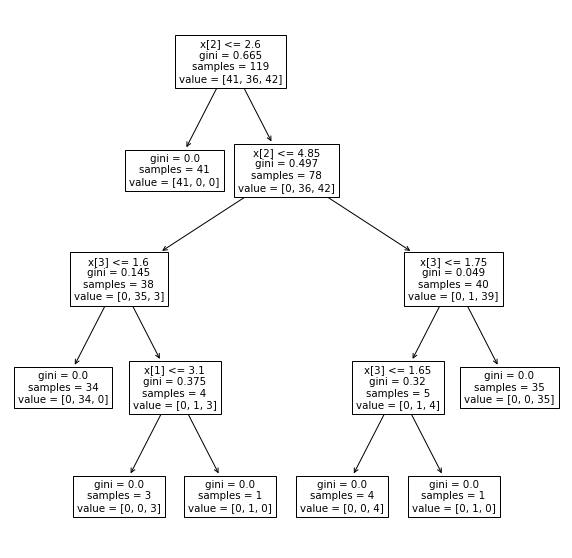

In [40]:
from sklearn.tree import plot_tree
plt.figure(figsize = (10,10))
plot_tree(dtc)

In [41]:
pip install dtreeviz

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install --upgrade dtreeviz


Note: you may need to restart the kernel to use updated packages.
